In [2]:
!pip install ts2vg

     |████████████████████████████████| 1.0 MB 13.3 MB/s 


Task 1

In [4]:
!pip install igraph

     |████████████████████████████████| 3.2 MB 13.9 MB/s 


In [3]:
!pip install cairocffi

     |████████████████████████████████| 88 kB 4.1 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89667 sha256=0f7442723584bd59bb46670e673dca3fa1b9f296627434756e673b7238966267
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [5]:
!pip install pycairo

     |████████████████████████████████| 344 kB 15.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from ts2vg import HorizontalVG
from ts2vg import NaturalVG

In [8]:
from google.colab import files
uploaded = files.upload()

Saving 1acc_climbingdown_chest.csv to 1acc_climbingdown_chest.csv
Saving 1acc_climbingup_chest.csv to 1acc_climbingup_chest.csv
Saving 1acc_running_chest.csv to 1acc_running_chest.csv
Saving 1acc_walking_chest.csv to 1acc_walking_chest.csv
Saving 2acc_climbingdown_chest.csv to 2acc_climbingdown_chest.csv
Saving 2acc_climbingup_chest.csv to 2acc_climbingup_chest.csv
Saving 2acc_running_chest.csv to 2acc_running_chest.csv
Saving 2acc_walking_chest.csv to 2acc_walking_chest.csv
Saving 3acc_climbingdown_chest.csv to 3acc_climbingdown_chest.csv
Saving 3acc_climbingup_chest.csv to 3acc_climbingup_chest.csv
Saving 3acc_running_chest.csv to 3acc_running_chest.csv
Saving 3acc_walking_chest.csv to 3acc_walking_chest.csv
Saving 4acc_climbingdown_chest.csv to 4acc_climbingdown_chest.csv
Saving 4acc_climbingup_chest.csv to 4acc_climbingup_chest.csv
Saving 4acc_running_chest.csv to 4acc_running_chest.csv
Saving 4acc_walking_chest.csv to 4acc_walking_chest.csv
Saving 5acc_climbingdown_chest.csv to 5a

In [69]:
column_names = ["Method", "Subject", "Accelerometer axis", "Average degree", "Network diameter", "Average path length", "Activity"]
Results_table1 = pd.DataFrame(columns = column_names)


Natural Visibility Graph

In [70]:
for subject_itr in range(1,16):
  for activity in ['walking', 'running', 'climbingup', 'climbingdown']:
    file_to_read = str(subject_itr) + 'acc_' + activity +'_chest' + '.csv'
    data= pd.read_csv(file_to_read)
    for attribute in ['attr_x', 'attr_y', 'attr_z']:
      g = NaturalVG()
      g.build(data[attribute][1000:2048])
      ig_ng = g.as_igraph()
      table_row = {'Method':'Natural Visibility Graph', 'Subject':subject_itr, 'Accelerometer axis':attribute, 'Average degree':np.mean(ig_ng.degree()), 'Network diameter':ig_ng.diameter(), 'Average path length':ig_ng.average_path_length(), 'Activity':activity}
      Results_table1 = Results_table1.append(table_row, ignore_index = True)

Horizontal Visibility Graph

In [71]:
for subject in range(1,16):
  for activity in ['walking', 'running', 'climbingup', 'climbingdown']:
    file_to_read = str(subject)+ 'acc_' + activity +'_chest' + '.csv'
    data = pd.read_csv(file_to_read)
    for attribute in ['attr_x', 'attr_y', 'attr_z']:
      g = HorizontalVG()
      g.build(data[attribute][1000:2048])
      ig_hg = g.as_igraph()
      table_row = {'Method':'Horizontal Visibility Graph', 'Subject':subject, 'Accelerometer axis':attribute, 'Average degree':np.mean(ig_hg.degree()), 'Network diameter':ig_hg.diameter(), 'Average path length':ig_hg.average_path_length(), 'Activity':activity}
      Results_table1 = Results_table1.append(table_row, ignore_index = True)

In [72]:
Results_table1

,Method,Subject,Accelerometer axis,Average degree,Network diameter,Average path length,Activity
0,Natural Visibility Graph,1,attr_x,11.572519,9,4.462960,walking
1,Natural Visibility Graph,1,attr_y,11.971374,9,4.299560,walking
2,Natural Visibility Graph,1,attr_z,8.583969,10,4.895552,walking
3,Natural Visibility Graph,1,attr_x,8.412214,9,4.330417,running
4,Natural Visibility Graph,1,attr_y,11.133588,84,29.279523,running
...,...,...,...,...,...,...,...
355,Horizontal Visibility Graph,15,attr_y,3.944656,33,13.997255,climbingup
356,Horizontal Visibility Graph,15,attr_z,3.965649,26,11.755691,climbingup
357,Horizontal Visibility Graph,15,attr_x,3.963740,28,12.843555,climbingdown
358,Horizontal Visibility Graph,15,attr_y,3.954198,27,13.035175,climbingdown


Scatter plots for average degree vs network diameter, colored according to the points walking and running.

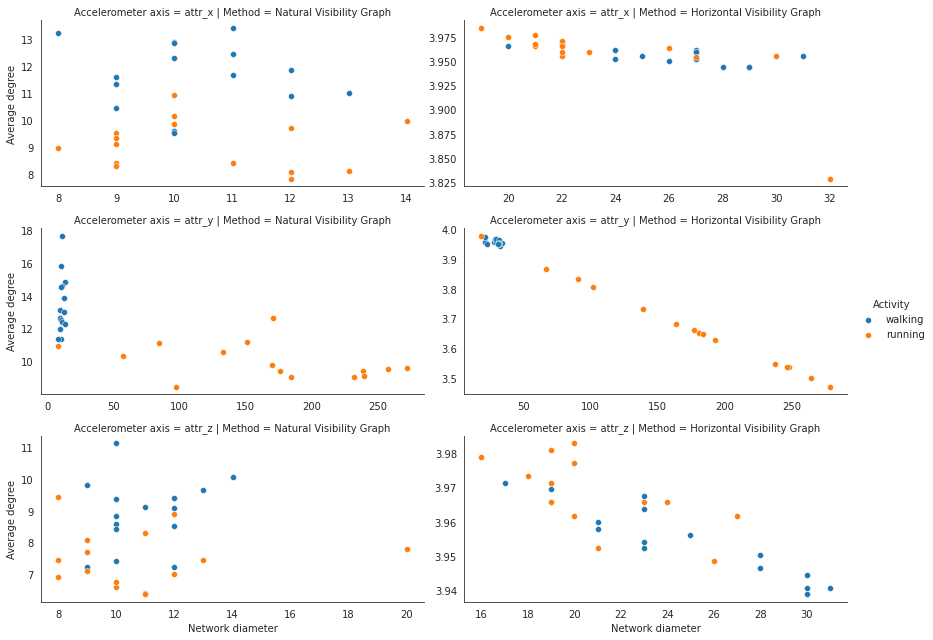

In [75]:
sns.set_style(style='white') 
plot_table1 = Results_table1[(Results_table1['Activity'].isin(['walking','running']))]
g = sns.FacetGrid(data = plot_table1, col="Method",row = "Accelerometer axis",hue="Activity",aspect= 2, sharex=False, sharey = False, legend_out= True)
g.map(sns.scatterplot, "Network diameter", "Average degree").add_legend()


Scatter plots for average degree vs network diameter, colored according to the points climbing up and climbing down.

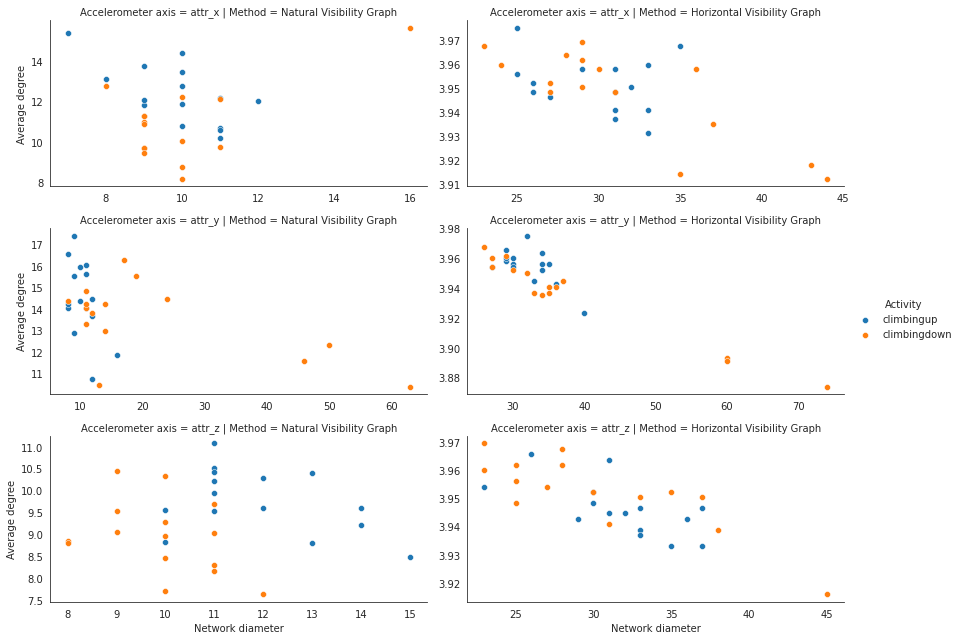

In [77]:
sns.set_style(style='white') 
plot_table2 = Results_table1[(Results_table1['Activity'].isin(['climbingup','climbingdown']))]
g = sns.FacetGrid(data = plot_table2, col="Method",row = "Accelerometer axis",hue="Activity",aspect= 2, sharex=False, sharey = False)
g.map(sns.scatterplot, "Network diameter", "Average degree").add_legend()

Task 2

In [27]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

Subject 1

In [28]:

from functools import singledispatch
import numpy as np
import pandas as pd
import csv

c_names = [ 'Subject', 'Accelerometer axis', 'Signal length', 'Dimension' , 'Delay' ,'Permutation entropy' , 'Complexity',  'Activity']
op_table1 = pd.DataFrame(columns = c_names)
walking= pd.read_csv('1acc_walking_chest.csv')
running= pd.read_csv('1acc_running_chest.csv')
climbingup= pd.read_csv('1acc_climbingup_chest.csv')
climbingdown= pd.read_csv('1acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]
attribute = ['attr_x', 'attr_y', 'attr_z']
Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '1', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)


Subject 2

In [29]:
walking= pd.read_csv('2acc_walking_chest.csv')
running= pd.read_csv('2acc_running_chest.csv')
climbingup= pd.read_csv('2acc_climbingup_chest.csv')
climbingdown= pd.read_csv('2acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '2', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)


Subject 3

In [30]:
walking= pd.read_csv('3acc_walking_chest.csv')
running= pd.read_csv('3acc_running_chest.csv')
climbingup= pd.read_csv('3acc_climbingup_chest.csv')
climbingdown= pd.read_csv('3acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '3', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

Subject 4

In [31]:
walking= pd.read_csv('4acc_walking_chest.csv')
running= pd.read_csv('4acc_running_chest.csv')
climbingup= pd.read_csv('4acc_climbingup_chest.csv')
climbingdown= pd.read_csv('4acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)
           output_tb = {'Subject': '4', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

Subject 5

In [32]:
walking= pd.read_csv('5acc_walking_chest.csv')
running= pd.read_csv('5acc_running_chest.csv')
climbingup= pd.read_csv('5acc_climbingup_chest.csv')
climbingdown= pd.read_csv('5acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '5', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

Subject 6

In [33]:
walking= pd.read_csv('6acc_walking_chest.csv')
running= pd.read_csv('6acc_running_chest.csv')
climbingup= pd.read_csv('6acc_climbingup_chest.csv')
climbingdown= pd.read_csv('6acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb1 = {'Subject': '6', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

subject 7

In [34]:
walking= pd.read_csv('7acc_walking_chest.csv')
running= pd.read_csv('7acc_running_chest.csv')
climbingup= pd.read_csv('7acc_climbingup_chest.csv')
climbingdown= pd.read_csv('7acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '7', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

subject 8

In [35]:
walking= pd.read_csv('8acc_walking_chest.csv')
running= pd.read_csv('8acc_running_chest.csv')
climbingup= pd.read_csv('8acc_climbingup_chest.csv')
climbingdown= pd.read_csv('8acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '8', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

subject 9

In [36]:
walking= pd.read_csv('9acc_walking_chest.csv')
running= pd.read_csv('9acc_running_chest.csv')
climbingup= pd.read_csv('9acc_climbingup_chest.csv')
climbingdown= pd.read_csv('9acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '9', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

subject 10

In [37]:
walking= pd.read_csv('10acc_walking_chest.csv')
running= pd.read_csv('10acc_running_chest.csv')
climbingup= pd.read_csv('10acc_climbingup_chest.csv')
climbingdown= pd.read_csv('10acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '10', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

subject 11

In [38]:
walking= pd.read_csv('11acc_walking_chest.csv')
running= pd.read_csv('11acc_running_chest.csv')
climbingup= pd.read_csv('11acc_climbingup_chest.csv')
climbingdown= pd.read_csv('11acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '11', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

subject 12

In [39]:
walking= pd.read_csv('12acc_walking_chest.csv')
running= pd.read_csv('12acc_running_chest.csv')
climbingup= pd.read_csv('12acc_climbingup_chest.csv')
climbingdown= pd.read_csv('12acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '12', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

subject 13

In [40]:
walking= pd.read_csv('13acc_walking_chest.csv')
running= pd.read_csv('13acc_running_chest.csv')
climbingup= pd.read_csv('13acc_climbingup_chest.csv')
climbingdown= pd.read_csv('13acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '13', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

subject 14

In [41]:
walking= pd.read_csv('14acc_walking_chest.csv')
running= pd.read_csv('14acc_running_chest.csv')
climbingup= pd.read_csv('14acc_climbingup_chest.csv')
climbingdown= pd.read_csv('14acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '14', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

subject 15

In [42]:
walking= pd.read_csv('15acc_walking_chest.csv')
running= pd.read_csv('15acc_running_chest.csv')
climbingup= pd.read_csv('15acc_climbingup_chest.csv')
climbingdown= pd.read_csv('15acc_climbingdown_chest.csv')
walking.name='walking'
running.name='running'
climbingup.name='climbingup'
climbingdown.name='climbingdown'
activity = [walking, running, climbingup, climbingdown]

Dim_list = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for act in activity:
  for ts in Signallength:
     for Dim in Dim_list:
       for Del in range(1,4):
         for attr in attribute:
  
           result = ordinal_patterns(act[attr][0:ts], Dim, Del)
           PE = p_entropy(result)
           Comp= complexity(result)

           output_tb = {'Subject': '15', 'Accelerometer axis':attr, 'Signal length': ts , 
                          'Dimension': Dim, 'Delay': Del, 'Permutation entropy':PE, 'Complexity': Comp,
                          'Activity' : act.name}

           op_table1=op_table1.append(output_tb, ignore_index=True)

In [43]:
op_table1

,Subject,Accelerometer axis,Signal length,Dimension,Delay,Permutation entropy,Complexity,Activity
0,1,attr_x,1024,3,1,0.855987,0.119191,walking
1,1,attr_y,1024,3,1,0.816343,0.145361,walking
2,1,attr_z,1024,3,1,0.913619,0.075973,walking
3,1,attr_x,1024,3,2,0.960568,0.036283,walking
4,1,attr_y,1024,3,2,0.925266,0.064556,walking
...,...,...,...,...,...,...,...,...
6475,15,attr_y,4096,6,2,0.893186,0.197215,climbingdown
6476,15,attr_z,4096,6,2,0.935939,0.135029,climbingdown
6477,15,attr_x,4096,6,3,0.936129,0.135052,climbingdown
6478,15,attr_y,4096,6,3,0.947647,0.113763,climbingdown


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

Scatter plot for walking and running

In [ ]:
df2_wr = op_table1[((op_table1['Activity']=="walking") | (op_table1['Activity']=="running")) & (op_table1['Signal length']==4096) & (op_table1['Delay']==1)]


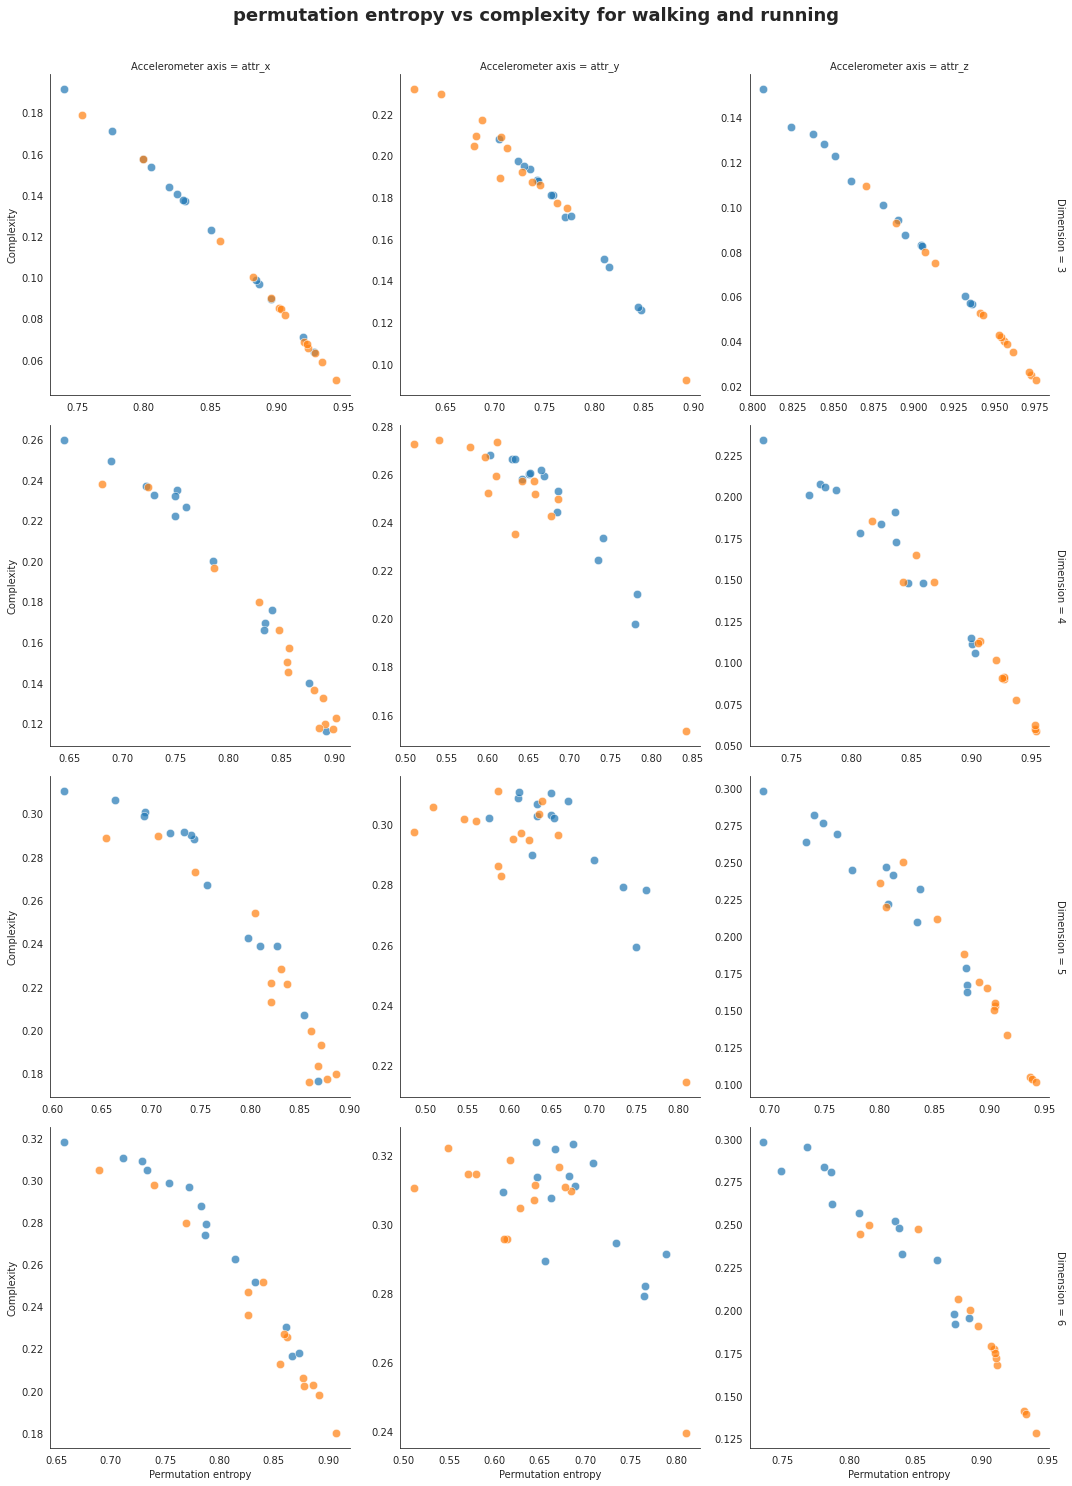

In [79]:
graph=sns.FacetGrid(df2_wr, row="Dimension", col="Accelerometer axis", hue="Activity", margin_titles=True, sharey=False, sharex=False, height=5 ,aspect=1)
wr_plt=graph.map(sns.scatterplot, "Permutation entropy", "Complexity", s=70, alpha=0.7)
wr_plt=g.add_legend()

wr_plot=plt.suptitle('permutation entropy vs complexity for walking and running' ,y=1.03, size=18,fontweight="bold")

scatterplot for climbingup and climbingdown

In [ ]:
df2_cl = op_table1[((op_table1['Activity']=="climbingup") | (op_table1['Activity']=="climbingdown")) & (op_table1['Signal length']==4096) & (op_table1['Delay']==1)]

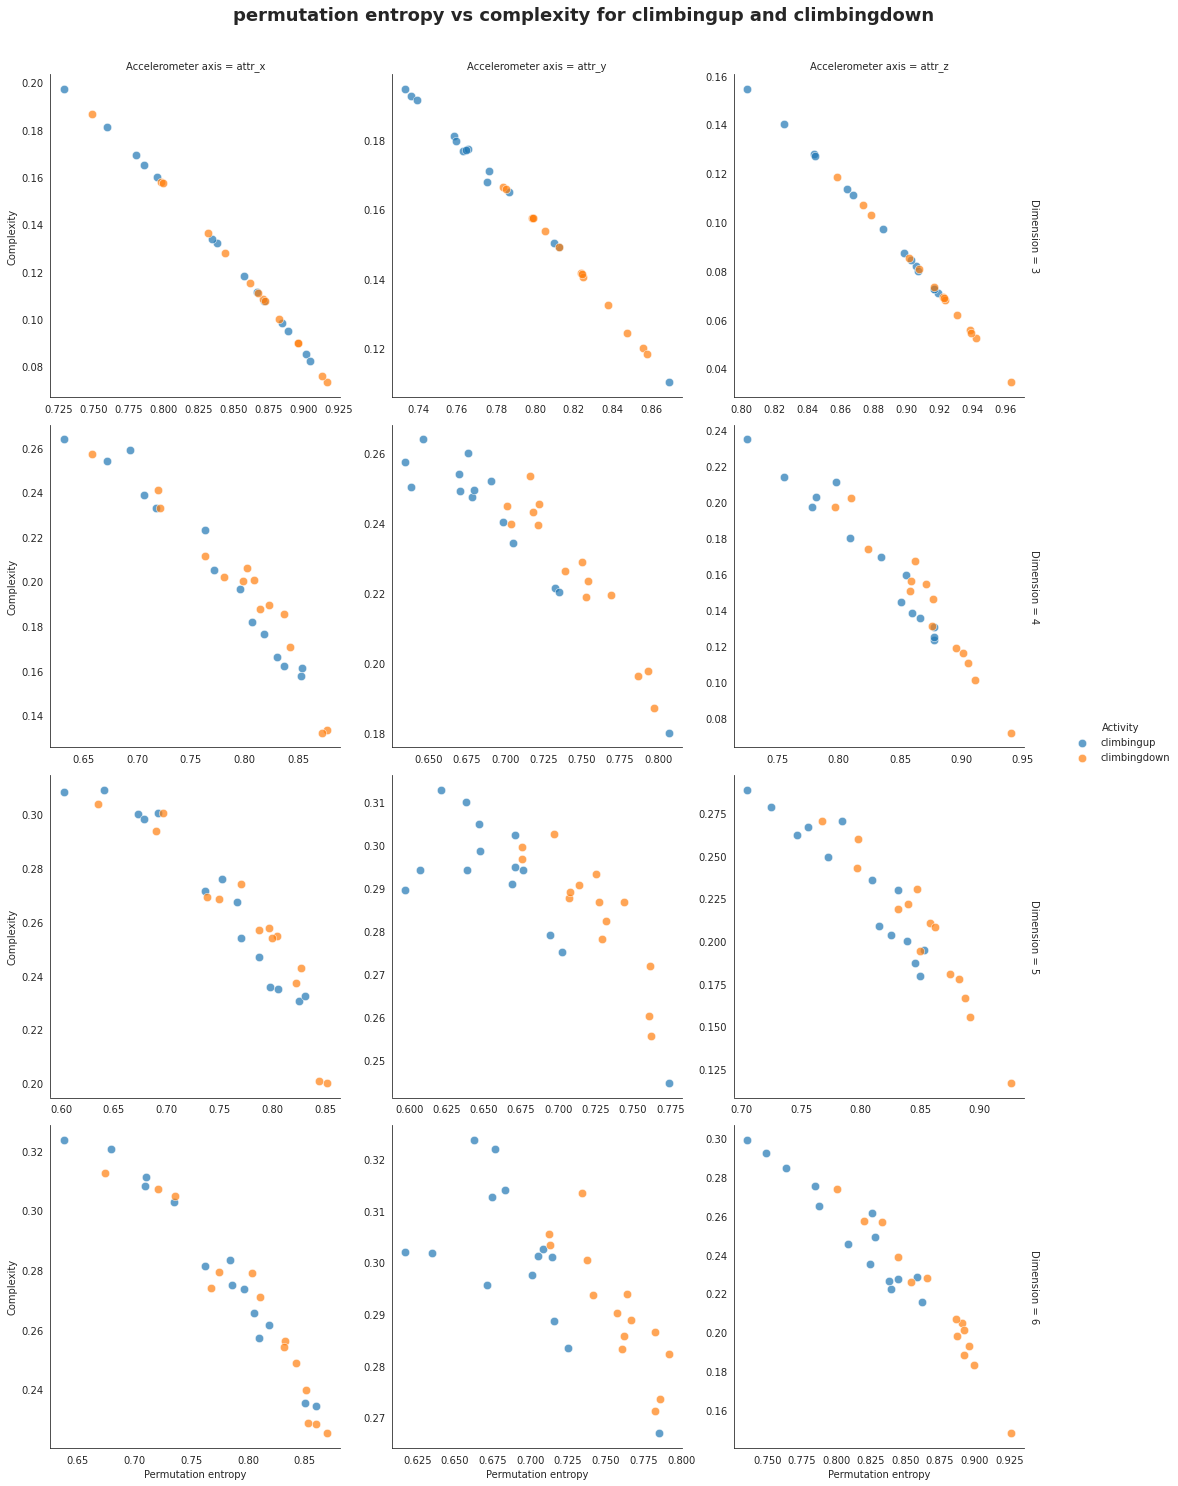

In [81]:
graph=sns.FacetGrid(df2_cl, row="Dimension", col="Accelerometer axis", hue="Activity", margin_titles=True, sharey=False, sharex=False, height=5 ,aspect=1)
cl_plt=graph.map(sns.scatterplot, "Permutation entropy", "Complexity", s=70, alpha=0.7)
cl_plt=graph.add_legend()
cl_plot=plt.suptitle('permutation entropy vs complexity for climbingup and climbingdown' ,y=1.03, size=18,fontweight="bold")